In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
bdata = sc.read("glioblastoma_raw.h5ad")

In [3]:
bdata

AnnData object with n_obs × n_vars = 1853 × 7683
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis'

In [4]:
bdata.obs.shape

(1853, 7)

In [5]:
bdata.obs.head(5)

,disease_state,plate_id,tissue,patient_id,cell_type,neoplastic_state,diagnosis
index,,,,,,,
GSM2243439,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243444,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243445,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243447,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic
GSM2243452,diagnosis: glioblastoma,plate id: 1001000173,tissue: Tumor,patient id: BT_S2,cell type: Neoplastic,neoplastic: Neoplastic,Neoplastic


In [6]:
bdata.var.shape

(7683, 0)

In [7]:
bdata.var.head(5)

""
index
ENSG00000000005
ENSG00000001561
ENSG00000001629
ENSG00000002587
ENSG00000002933


In [8]:
bdata.X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 55., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 43., ...,  0.,  0.,  0.]], dtype=float32)

In [9]:
# Creating Ann data from the csv files in the dataset

In [10]:
count_data = pd.read_csv("brain_counts.csv", index_col=0)
count_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [11]:
count_data.shape

(3401, 23433)

In [12]:
meta_brain = pd.read_csv("brain_metadata.csv", index_col=0)
print(meta_brain.shape)
meta_brain.head()

(3401, 5)


,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [13]:
print(pd.value_counts(meta_brain["cell_ontology_class"]))

cell_ontology_class
oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: count, dtype: int64


In [14]:
print(pd.value_counts(meta_brain["subtissue"]))

subtissue
Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: count, dtype: int64


In [15]:
print(pd.value_counts(meta_brain["mouse.sex"]))

mouse.sex
M    2694
F     707
Name: count, dtype: int64


In [16]:
# construct anndata
adata = sc.AnnData(X=count_data, obs=meta_brain)
print(adata.shape)

(3401, 23433)


In [17]:
adata.X

array([[  0, 125,  16, ...,   0,  54,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 348,   0, ...,   0, 113,   0],
       ...,
       [  0, 135,  41, ...,   0,  45,   0],
       [  0, 129,  54, ...,   0,  57,   0],
       [  0,   1,   0, ...,   0,   0,   0]], dtype=int64)

In [18]:
adata.obs

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923
...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,oligodendrocyte precursor cell,Cortex,M,3_9_M,MAA000926
P9.MAA000930.3_8_M.1.1,astrocyte,Cortex,M,3_8_M,MAA000930
P9.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932


In [19]:
adata.var

""
0610005C13Rik
0610007C21Rik
0610007L01Rik
0610007N19Rik
0610007P08Rik
...
Zzef1
Zzz3
a
l7Rn6


In [20]:
in_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        in_spike_in[gene_name] = True
        number_of_spike_ins += 1
    else:
        in_spike_in[gene_name] = False

adata.var['ERCC'] = pd.Series(in_spike_in)

print("Found these many spike ins: ", number_of_spike_ins)

Found these many spike ins:  92


In [21]:
adata.var.head()

,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False


In [22]:
adata.write('brain_raw.h5ad')

In [23]:
adata = sc.read("brain_raw.h5ad")

In [24]:
adata.obs.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [25]:
adata.var.head()

,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False


In [26]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars=['ERCC'])

In [27]:
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

In [28]:
cell_qc_dataframe.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_ERCC,log1p_total_counts_ERCC,pct_counts_ERCC
cell,,,,,,,,,,,
A1.B003290.3_38_F.1.1,3359,8.119696,390075,12.874097,25.884766,32.847017,42.219573,59.472666,10201,9.230339,2.615138
A1.B003728.3_56_F.1.1,1718,7.449498,776439,13.562475,43.051933,52.912721,65.313309,87.315423,67351,11.117688,8.674345
A1.MAA000560.3_10_M.1.1,3910,8.271548,1616087,14.295519,44.066006,51.514553,60.164211,74.451190,29870,10.304643,1.848292
A1.MAA000564.3_10_M.1.1,4352,8.378621,360004,12.793873,41.650926,48.958623,56.997422,69.736170,2592,7.860571,0.719992
A1.MAA000923.3_9_M.1.1,2248,7.718241,290282,12.578612,63.392494,69.136908,77.168753,90.522320,11002,9.305923,3.790108


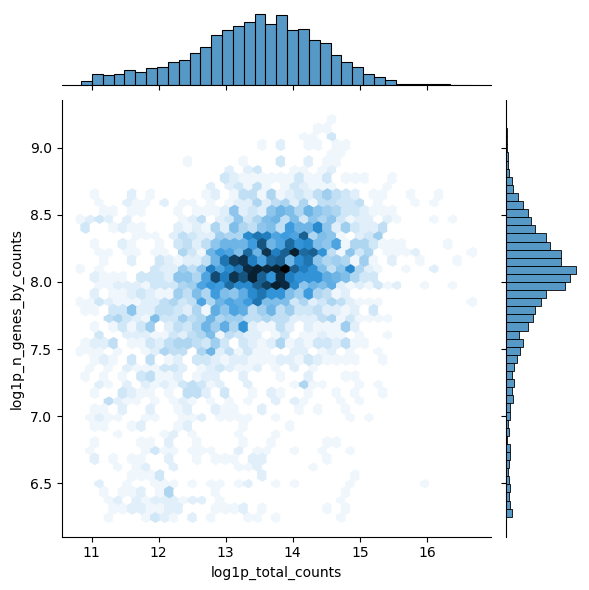

In [29]:
sns.jointplot(
    data = cell_qc_dataframe,
    x = 'log1p_total_counts',
    y  = 'log1p_n_genes_by_counts',
    kind= "hex"
)

<Axes: xlabel='pct_counts_ERCC', ylabel='Count'>

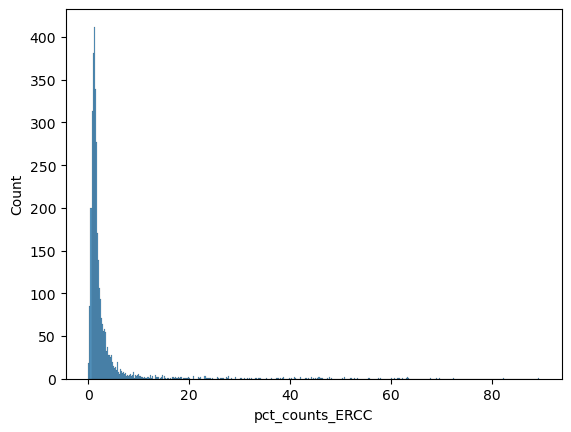

In [30]:
sns.histplot(cell_qc_dataframe["pct_counts_ERCC"])

In [31]:
gene_qc_dataframe.head()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
0610005C13Rik,28,0.118201,0.111721,99.176713,402,5.998937
0610007C21Rik,2399,206.211996,5.333742,29.461923,701327,13.460731
0610007L01Rik,961,35.938547,3.609256,71.743605,122227,11.713643
0610007N19Rik,272,6.498383,2.014687,92.002352,22101,10.003423
0610007P08Rik,582,16.328727,2.852366,82.887386,55534,10.924769


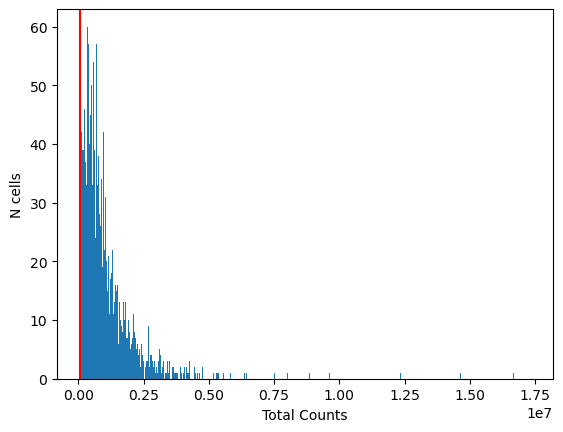

In [32]:
plt.hist(cell_qc_dataframe['total_counts'], bins = 1000)
plt.xlabel("Total Counts")
plt.ylabel('N cells')
plt.axvline(50000, color = "red")

In [33]:
sum(cell_qc_dataframe['total_counts'] < 50000)

0

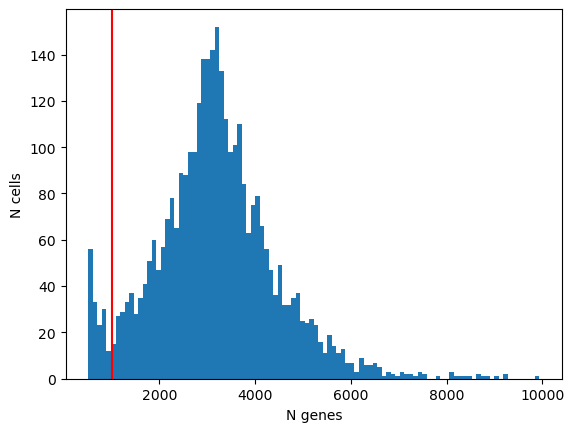

In [34]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins = 100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')

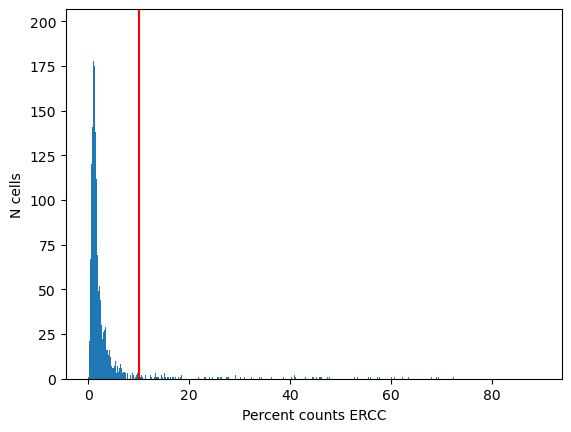

In [35]:
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=1000)
plt.xlabel('Percent counts ERCC')
plt.ylabel('N cells')
plt.axvline(10, color='red')

In [36]:
low_ERCC_mask = (cell_qc_dataframe['pct_counts_ERCC'] < 10)
adata = adata[low_ERCC_mask]

In [37]:
sc.pp.filter_cells(adata, min_genes=750)

In [38]:
adata

AnnData object with n_obs × n_vars = 3210 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC'

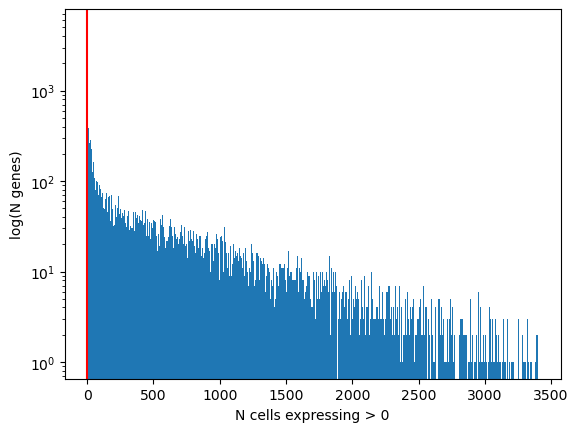

In [39]:
# quality control for genes
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins = 1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red')
plt.yscale('log') 

In [40]:
sum(gene_qc_dataframe['n_cells_by_counts'] < 2)

3969

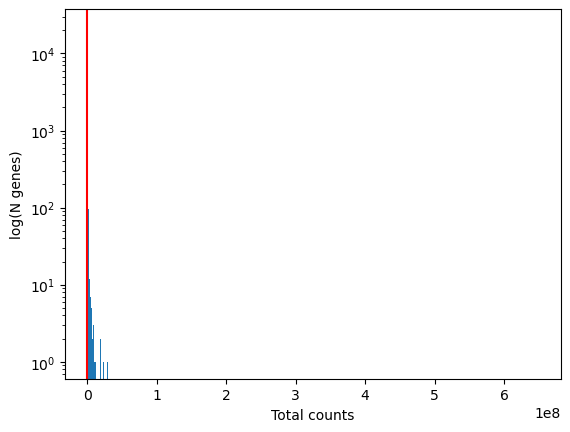

In [41]:
plt.hist(gene_qc_dataframe['total_counts'], bins = 1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)') # for visual clarity
plt.yscale('log') 
plt.axvline(10, color='red')

In [42]:
sum(gene_qc_dataframe['total_counts'] < 10)

4432

In [43]:
sc.pp.filter_genes(adata, min_cells=2)
sc.pp.filter_genes(adata, min_counts=10)

In [44]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'

In [45]:
adata.write("brain_qc.h5ad")

In [46]:
# Normalization

In [47]:
adata = sc.read("brain_qc.h5ad")

In [48]:
adata.X.shape

(3210, 18585)

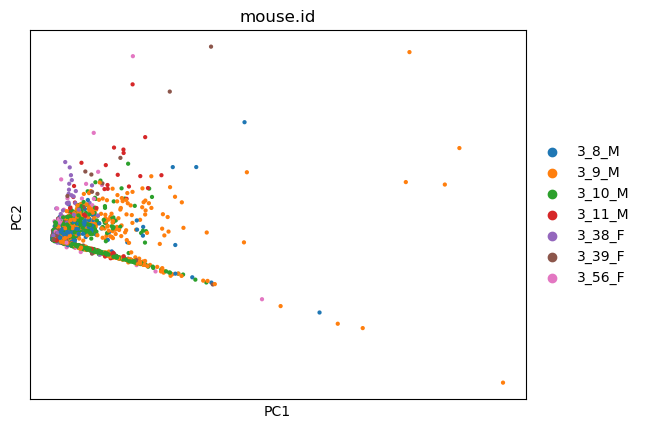

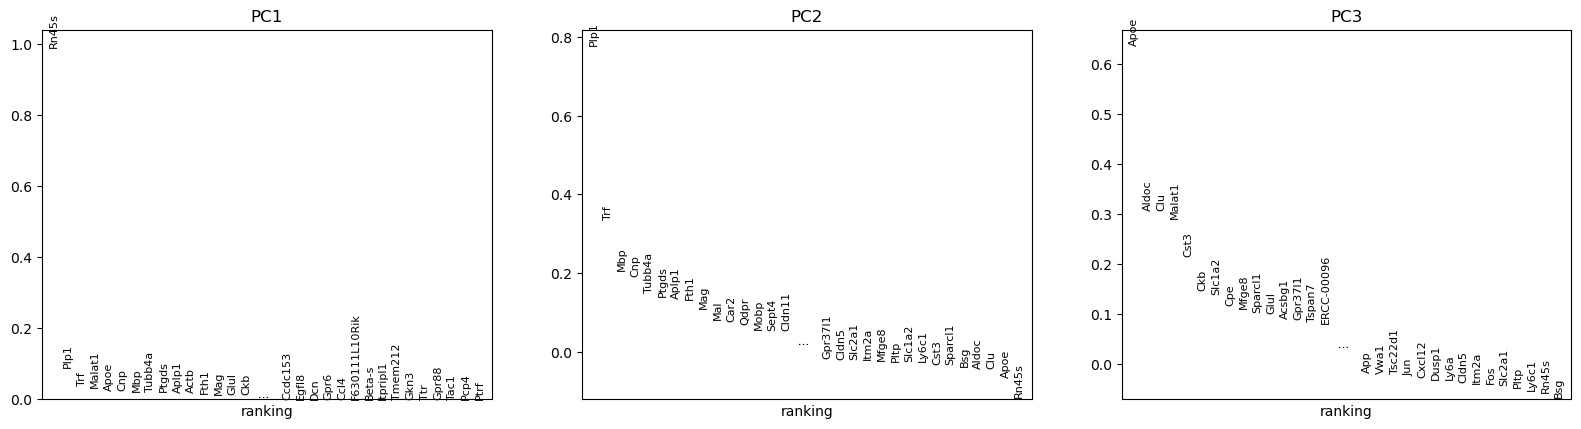

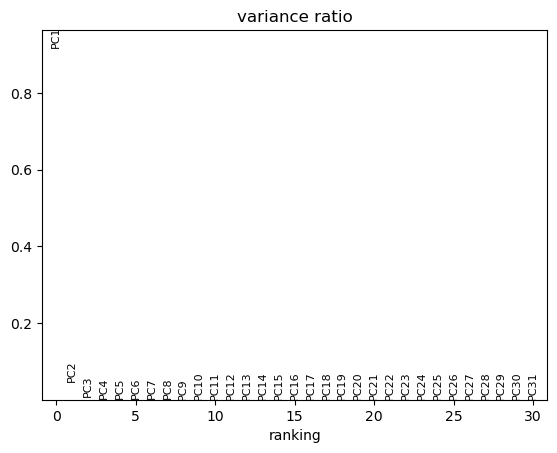

In [49]:
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color = "mouse.id")

In [50]:
adata.uns

OrderedDict([('pca',
              {'params': {'zero_center': True,
                'use_highly_variable': False,
                'mask_var': None},
               'variance': array([7.57782081e+10, 3.81942914e+09, 6.94500624e+08, 3.08484999e+08,
                      2.63227368e+08, 2.13846111e+08, 1.70252544e+08, 1.36167213e+08,
                      8.26416428e+07, 5.90083972e+07, 4.80472411e+07, 4.61984941e+07,
                      4.13718280e+07, 3.16401711e+07, 3.07673338e+07, 2.82930440e+07,
                      2.59999784e+07, 2.27497873e+07, 2.10875197e+07, 1.88880728e+07,
                      1.69006481e+07, 1.57581542e+07, 1.48261436e+07, 1.37964653e+07,
                      1.33654032e+07, 1.19485000e+07, 1.11319053e+07, 1.06206045e+07,
                      1.03378224e+07, 9.83096769e+06, 8.65349817e+06, 8.30520541e+06,
                      7.72390529e+06, 7.61951954e+06, 7.32866236e+06, 6.91214488e+06,
                      6.78554127e+06, 6.14679091e+06, 6.07442828e

In [51]:
print(adata.varm['PCs'].shape)

(18585, 50)


In [52]:
adata.varm['PCs']

array([[ 3.90559261e-07, -1.04339245e-06,  5.01953361e-06, ...,
        -1.24506693e-05,  5.49261469e-06,  8.34793111e-06],
       [ 5.04033929e-04,  7.00641257e-04,  3.00280268e-03, ...,
        -2.04545576e-03, -1.42752459e-02, -6.23745219e-03],
       [ 9.63757867e-05, -1.56630619e-04, -1.34476791e-04, ...,
        -5.91278025e-03, -5.15749157e-03, -6.89312314e-03],
       ...,
       [ 6.28575389e-05,  8.21345351e-05,  1.00800709e-04, ...,
         1.86724802e-03, -1.76053726e-03,  5.49906520e-03],
       [ 4.99979287e-08, -2.79155057e-07, -4.34064565e-07, ...,
         4.06686790e-06,  4.97050236e-06,  3.38387423e-06],
       [ 2.24475899e-04, -1.46511584e-04,  1.68350801e-03, ...,
         1.52033607e-03,  4.50203441e-03, -4.31560279e-03]])

In [53]:
print(adata.obsm['X_pca'].shape)
adata.obsm['X_pca']

(3210, 50)


array([[-1.8424262e+05, -1.3552747e+04,  2.3973022e+03, ...,
        -1.5601984e+03,  6.8164844e+02,  4.2361938e+01],
       [-1.6474755e+05, -1.9324459e+04,  5.1527844e+04, ...,
         1.3176158e+03,  3.1714888e+03,  2.7396455e+03],
       [ 9.0670752e+03,  8.0857055e+04,  6.4449331e+03, ...,
         2.2792837e+03, -4.0856451e+02, -5.2319739e+02],
       ...,
       [-1.8081212e+05, -1.4364995e+04, -4.0254963e+03, ...,
         6.0876678e+02,  7.2786078e+02, -5.0457767e+02],
       [-4.4792086e+04,  1.3990004e+04, -3.5562534e+03, ...,
         6.0536475e+02, -4.4264130e+01, -4.8476660e+02],
       [-1.8489636e+05, -1.4003842e+04,  2.1832595e+03, ...,
         9.8997139e+01,  7.8757973e+01,  4.2160725e+01]], dtype=float32)

In [54]:
adata_cpm = adata.copy()
adata_cpm.raw = adata_cpm
adata_cpm.X = adata_cpm.X.astype(float)
sc.pp.normalize_per_cell(adata_cpm, counts_per_cell_after=1e6)

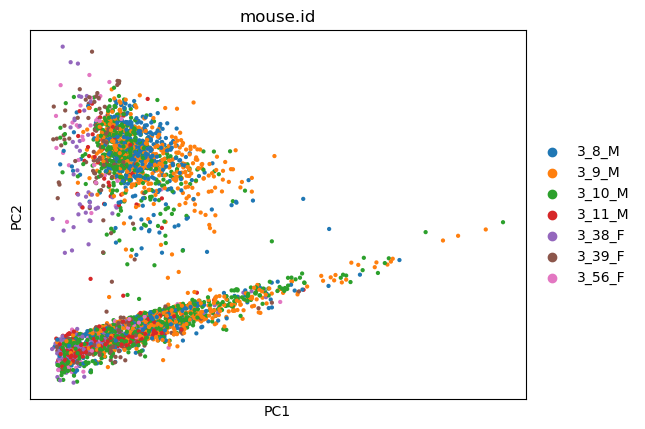

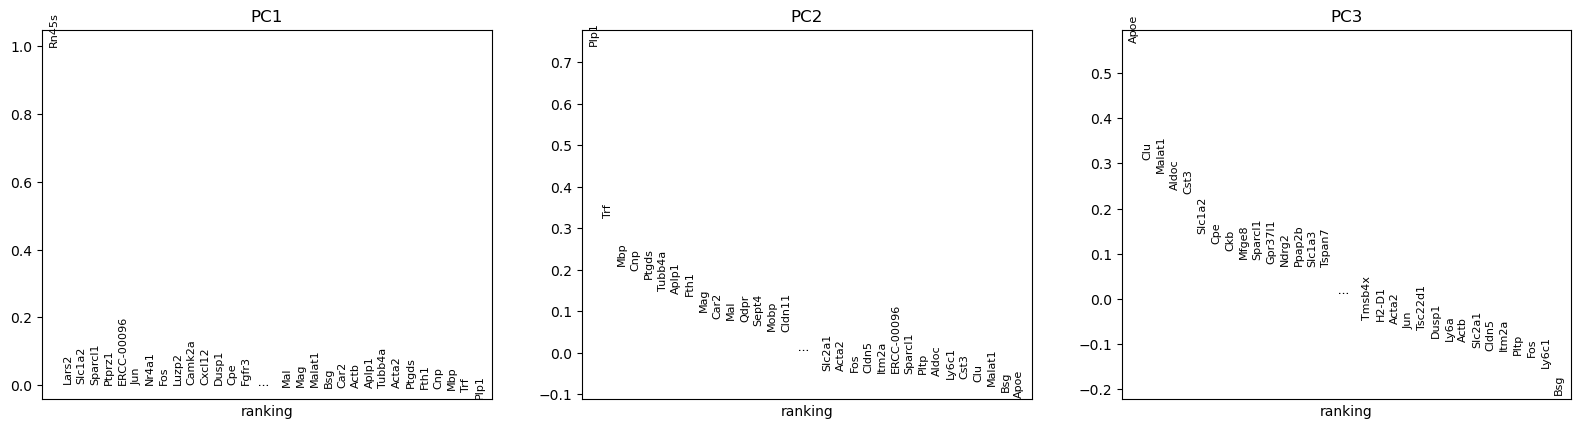

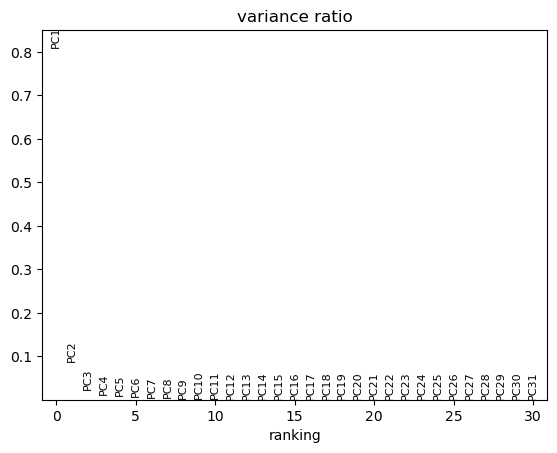

In [55]:
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='mouse.id')

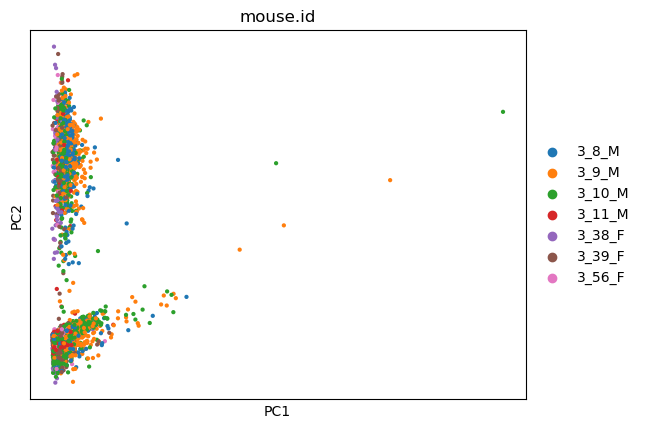

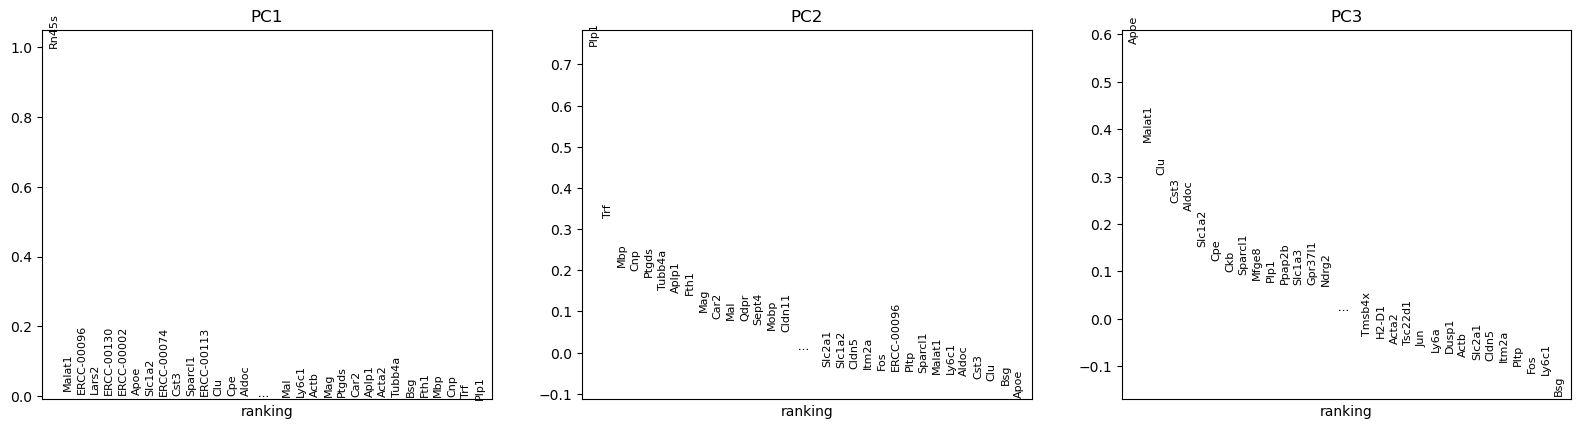

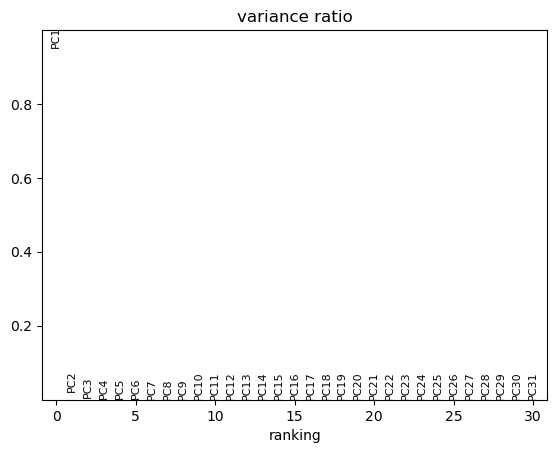

In [56]:
adata_cpm_ex = adata.copy()
adata_cpm_ex.X = adata_cpm_ex.X.astype(float)
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True)
sc.pp.pca(adata_cpm_ex)
sc.pl.pca_overview(adata_cpm_ex, color='mouse.id')

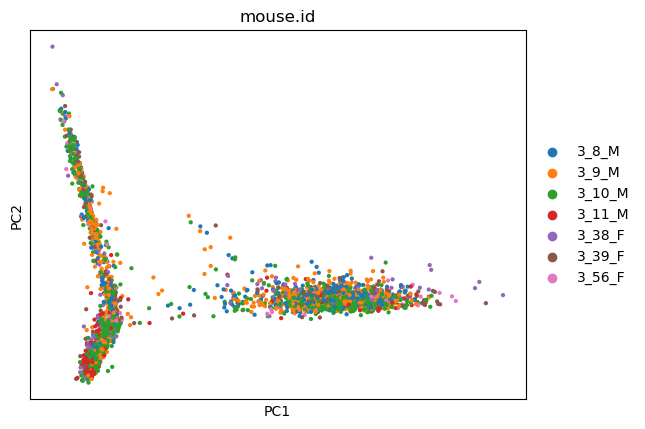

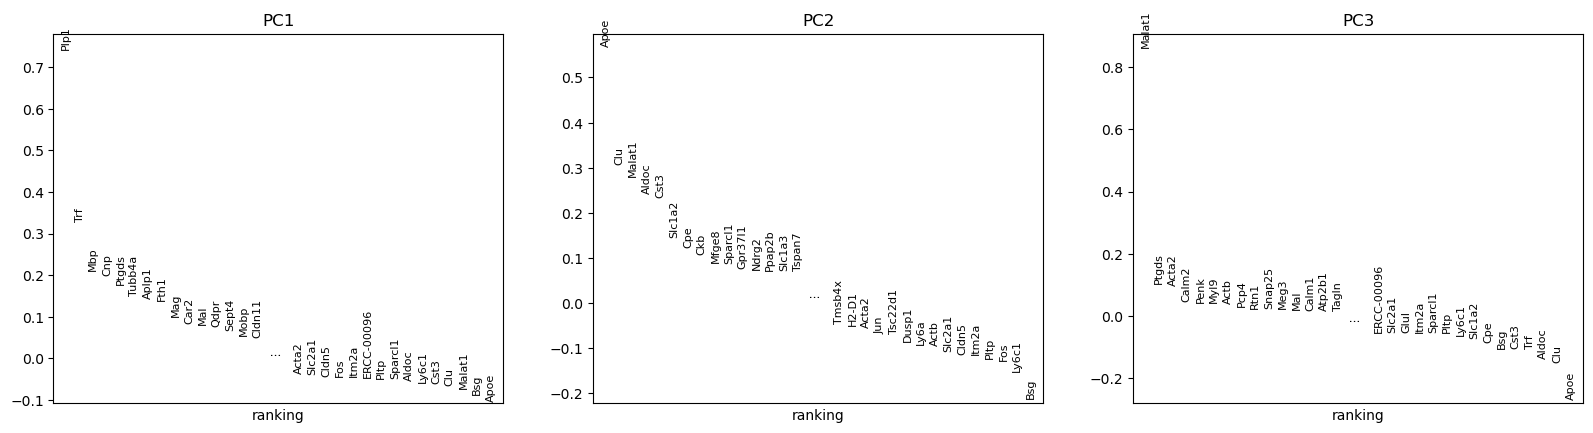

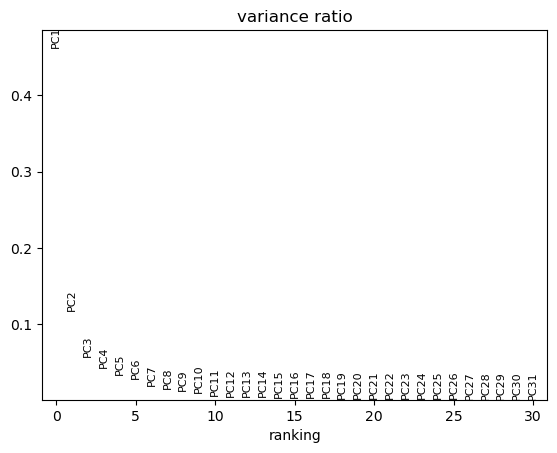

In [57]:
not_Rn45s = adata_cpm.var.index != 'Rn45s'
adata_no_Rn45s = adata_cpm[:, not_Rn45s]
sc.pp.pca(adata_no_Rn45s)
sc.pl.pca_overview(adata_no_Rn45s, color='mouse.id')

In [58]:
print(adata.shape)
print(adata_no_Rn45s.shape) 

(3210, 18585)
(3210, 18584)


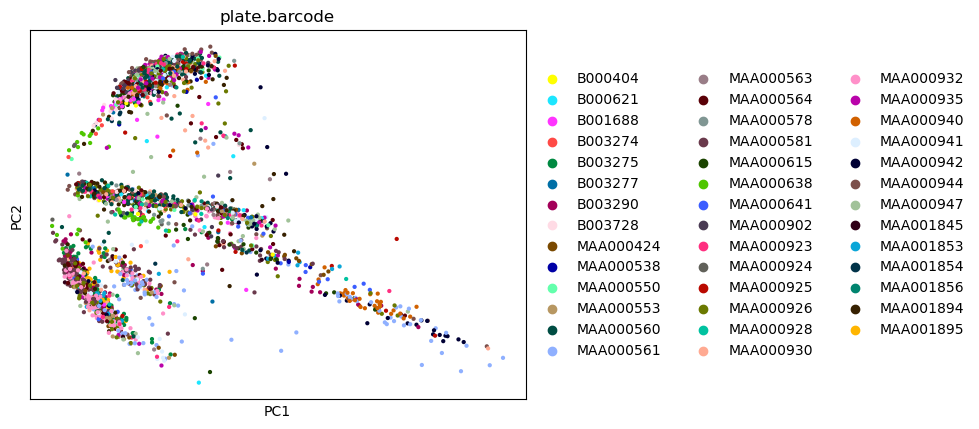

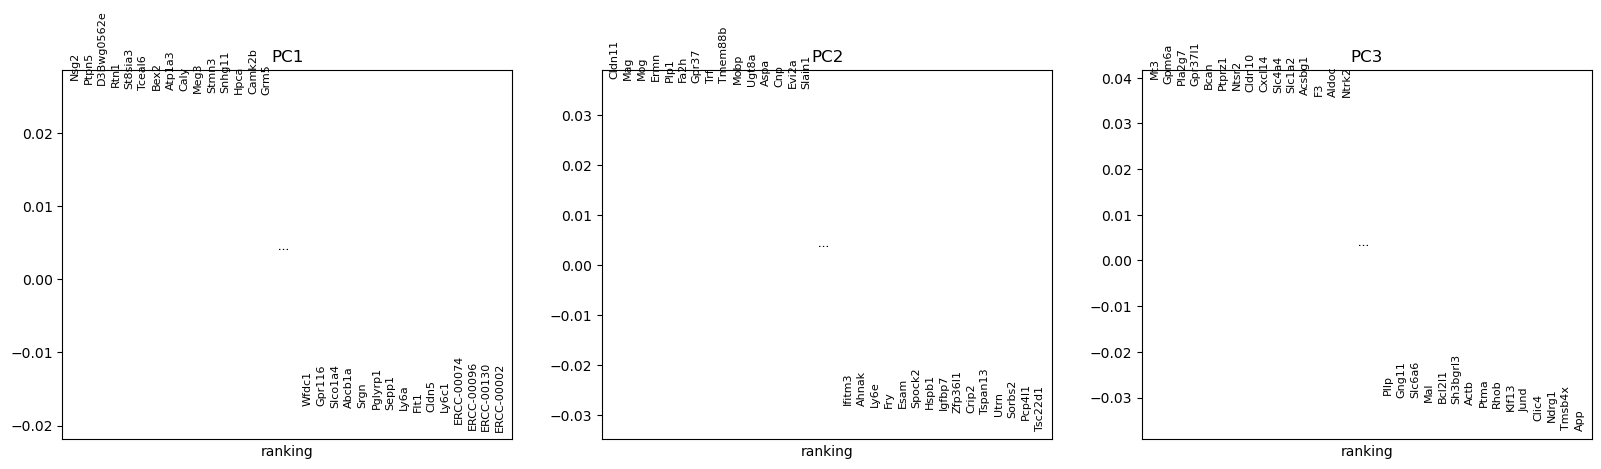

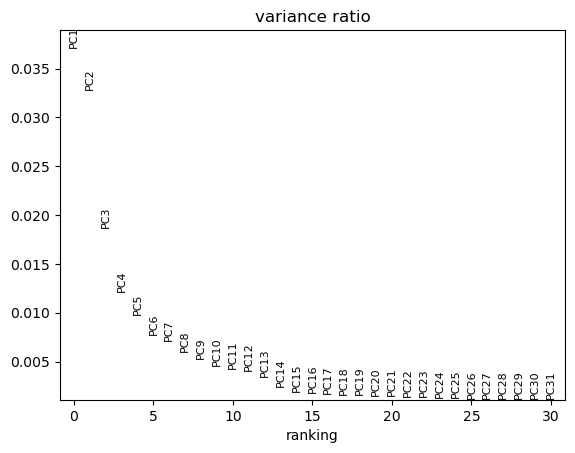

In [59]:
sc.pp.log1p(adata_cpm)
sc.pp.scale(adata_cpm)
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color = "plate.barcode")

In [60]:
adata_cpm.write('brain_normalized.h5ad')

In [61]:
adata = sc.read("brain_normalized.h5ad")

In [62]:
adata.var.head()

,ERCC,n_cells,n_counts,mean,std
0610005C13Rik,False,28,402,0.016376,0.202364
0610007C21Rik,False,2358,686914,3.775246,2.542979
0610007L01Rik,False,951,122212,1.127669,1.956620
0610007N19Rik,False,266,21897,0.295270,1.082449
0610007P08Rik,False,577,55529,0.621058,1.495668


In [63]:
adata.obs.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
cell,,,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0


In [64]:
adata.X.shape

(3210, 18585)

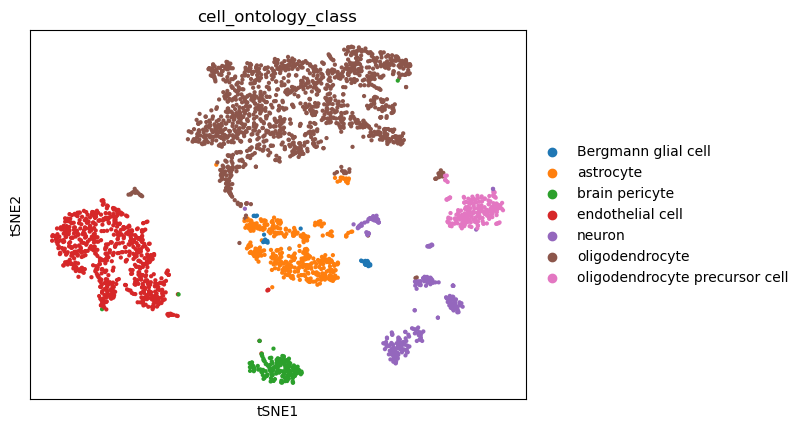

In [65]:
sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(adata, color='cell_ontology_class')

In [66]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'mouse.id_colors', 'pca', 'plate.barcode_colors', 'tsne', 'cell_ontology_class_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [67]:
# UMAP
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

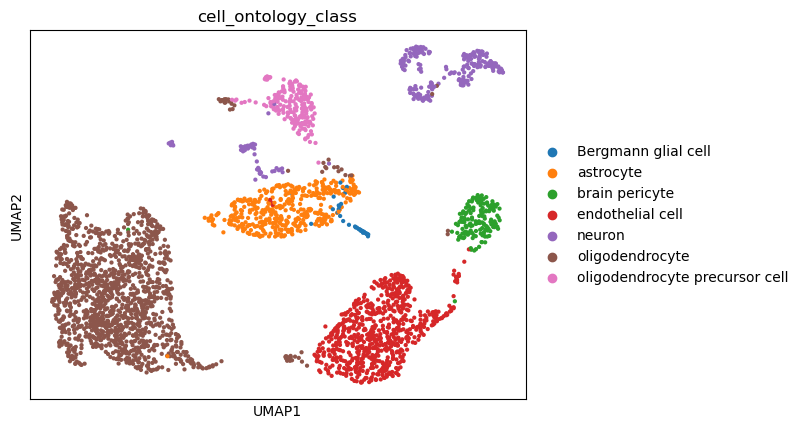

In [68]:
sc.pl.umap(adata, color="cell_ontology_class")

In [69]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'mouse.id_colors', 'pca', 'plate.barcode_colors', 'tsne', 'cell_ontology_class_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [70]:
adata.X.shape

(3210, 18585)

In [71]:
adata.write('brain_embeddings.h5ad')

In [72]:
adata = sc.read('brain_embeddings.h5ad')

In [73]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'log1p', 'mouse.id_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

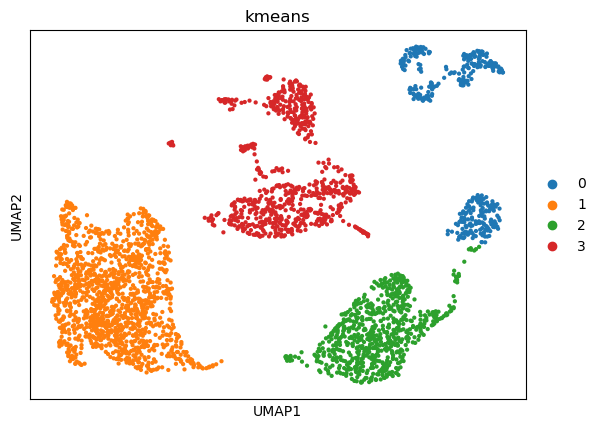

In [74]:
umap_coordinates = adata.obsm["X_umap"]
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates)
adata.obs["kmeans"] = kmeans.labels_
adata.obs["kmeans"] = adata.obs['kmeans'].astype(str)
sc.pl.umap(adata, color='kmeans')

In [75]:
print(kmeans.labels_)
adata.obs.head()

[3 3 1 ... 2 1 3]


,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts,kmeans
cell,,,,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0,3
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0,3
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0,1
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0,2
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0,3


In [76]:
adata.obs['cell_ontology_class'].unique()

['astrocyte', 'oligodendrocyte', 'endothelial cell', 'neuron', 'oligodendrocyte precursor cell', 'Bergmann glial cell', 'brain pericyte']
Categories (7, object): ['Bergmann glial cell', 'astrocyte', 'brain pericyte', 'endothelial cell', 'neuron', 'oligodendrocyte', 'oligodendrocyte precursor cell']

In [77]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.85


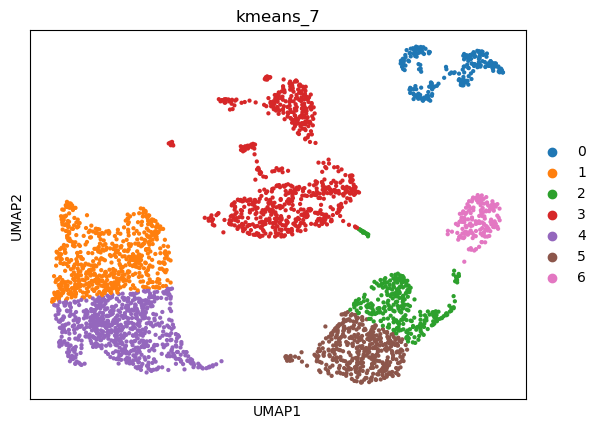

In [78]:
umap_coordinates = adata.obsm['X_umap']
kmeans = KMeans(n_clusters=7, random_state=0).fit(umap_coordinates)
adata.obs['kmeans_7'] = kmeans.labels_
adata.obs['kmeans_7'] = adata.obs['kmeans_7'].astype(str)
sc.pl.umap(adata, color='kmeans_7')

In [79]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans_7'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.53


In [80]:
"""sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color='leiden')"""

"sc.tl.leiden(adata, resolution=1.0)\nsc.pl.umap(adata, color='leiden')"

In [81]:
adata.obs.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts,kmeans,kmeans_7
cell,,,,,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0,3,3
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0,3,3
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0,1,4
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0,2,2
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0,3,3


In [82]:
"""rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['leiden'])
print('The rand index is ', round(rand_index, 2))"""

"rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['leiden'])\nprint('The rand index is ', round(rand_index, 2))"

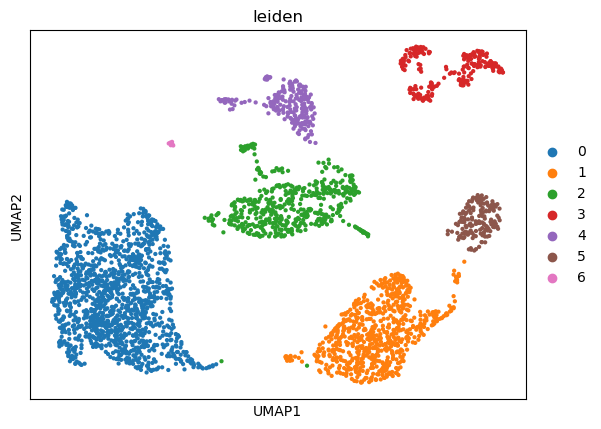

The rand index is  0.92


In [83]:
sc.tl.leiden(adata, resolution=0.1)
sc.pl.umap(adata, color='leiden')
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['leiden'])
print('The rand index is ', round(rand_index, 2))

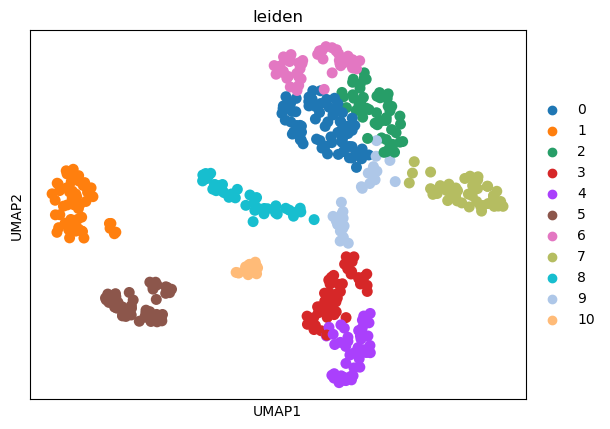

In [84]:
cerebellum = adata[adata.obs['subtissue'] == 'Cerebellum']
sc.pp.neighbors(cerebellum)
sc.tl.umap(cerebellum)

sc.tl.leiden(cerebellum)
sc.pl.umap(cerebellum, color='leiden')

In [85]:
cerebellum

AnnData object with n_obs × n_vars = 481 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts', 'kmeans', 'kmeans_7', 'leiden'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'log1p', 'mouse.id_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap', 'kmeans_colors', 'kmeans_7_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [86]:
sc.tl.leiden(adata, resolution=0.1)
adata.write('brain_clusters.h5ad')

In [87]:
adata = sc.read("brain_clusters.h5ad")
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts', 'kmeans', 'kmeans_7', 'leiden'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'kmeans_7_colors', 'kmeans_colors', 'leiden', 'leiden_colors', 'log1p', 'mouse.id_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [88]:
raw = pd.DataFrame(data=adata.raw.X, index=adata.raw.obs_names, columns=adata.raw.var_names)

In [89]:
print(raw.shape)
raw.head()

(3210, 18585)


,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,316,...,266,0,0,0,0,0,195,0,0,113
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,14,0,...,0,0,0,0,0,125,0,1,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,0,81,0,0,0,0,0


In [90]:
adata.obs.cell_ontology_class.unique()

['astrocyte', 'oligodendrocyte', 'endothelial cell', 'neuron', 'oligodendrocyte precursor cell', 'Bergmann glial cell', 'brain pericyte']
Categories (7, object): ['Bergmann glial cell', 'astrocyte', 'brain pericyte', 'endothelial cell', 'neuron', 'oligodendrocyte', 'oligodendrocyte precursor cell']

In [91]:
astrocyte_marker = 'Gja1'
cluster2 = raw[adata.obs['leiden'] == '2']
not_cluster2 = raw[adata.obs['leiden'] != '2']

In [92]:
cluster2.head() 

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,0,81,0,0,0,0,0
A1.MAA000930.3_8_M.1.1,0,0,0,0,0,0,0,0,0,587,...,0,0,0,0,3,0,0,0,0,0
A10.MAA000926.3_9_M.1.1,0,136,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,76,181,0,129


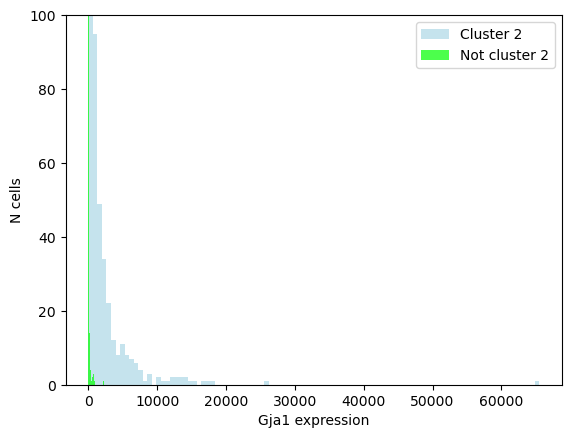

In [93]:
cluster2_marker_exp = cluster2[astrocyte_marker]
plt.hist(cluster2_marker_exp.values, bins = 100, color='lightblue', alpha=0.7, label='Cluster 2')
not_cluster2_marker_exp = not_cluster2[astrocyte_marker]
plt.hist(not_cluster2_marker_exp, bins=100, color='lime', alpha=0.7, label='Not cluster 2')
plt.ylim(0,100) # Cut off at N=100 for visual clarity
plt.xlabel('%s expression'%astrocyte_marker) # label our axes
plt.ylabel('N cells')
plt.legend()

In [95]:
from scipy.stats import ttest_ind

ttest = ttest_ind(cluster2_marker_exp,not_cluster2_marker_exp,equal_var=False,nan_policy='omit')
print(ttest)

TtestResult(statistic=10.638686487972423, pvalue=5.368410894420335e-24, df=507.23301468757336)


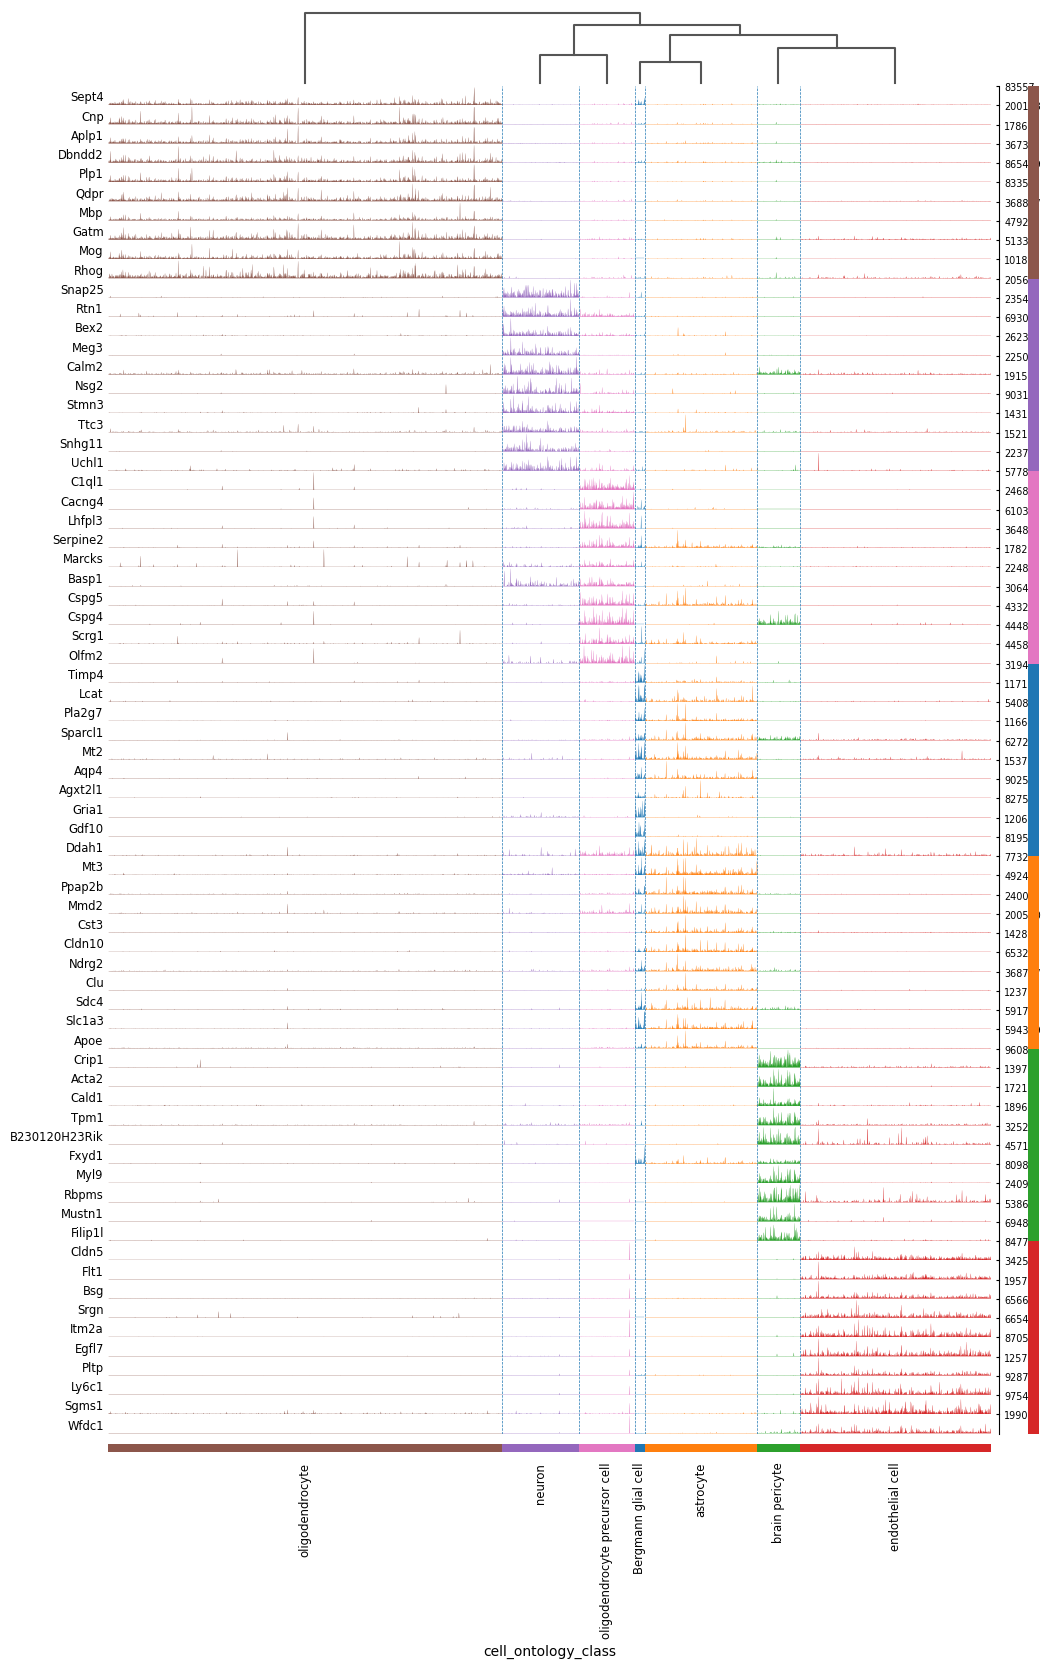

In [97]:
sc.tl.rank_genes_groups(adata, groupby = "cell_ontology_class", use_raw=True, method='t-test_overestim_var', n_genes=10)
sc.pl.rank_genes_groups_tracksplot(adata, groupby="cell_ontology_class")

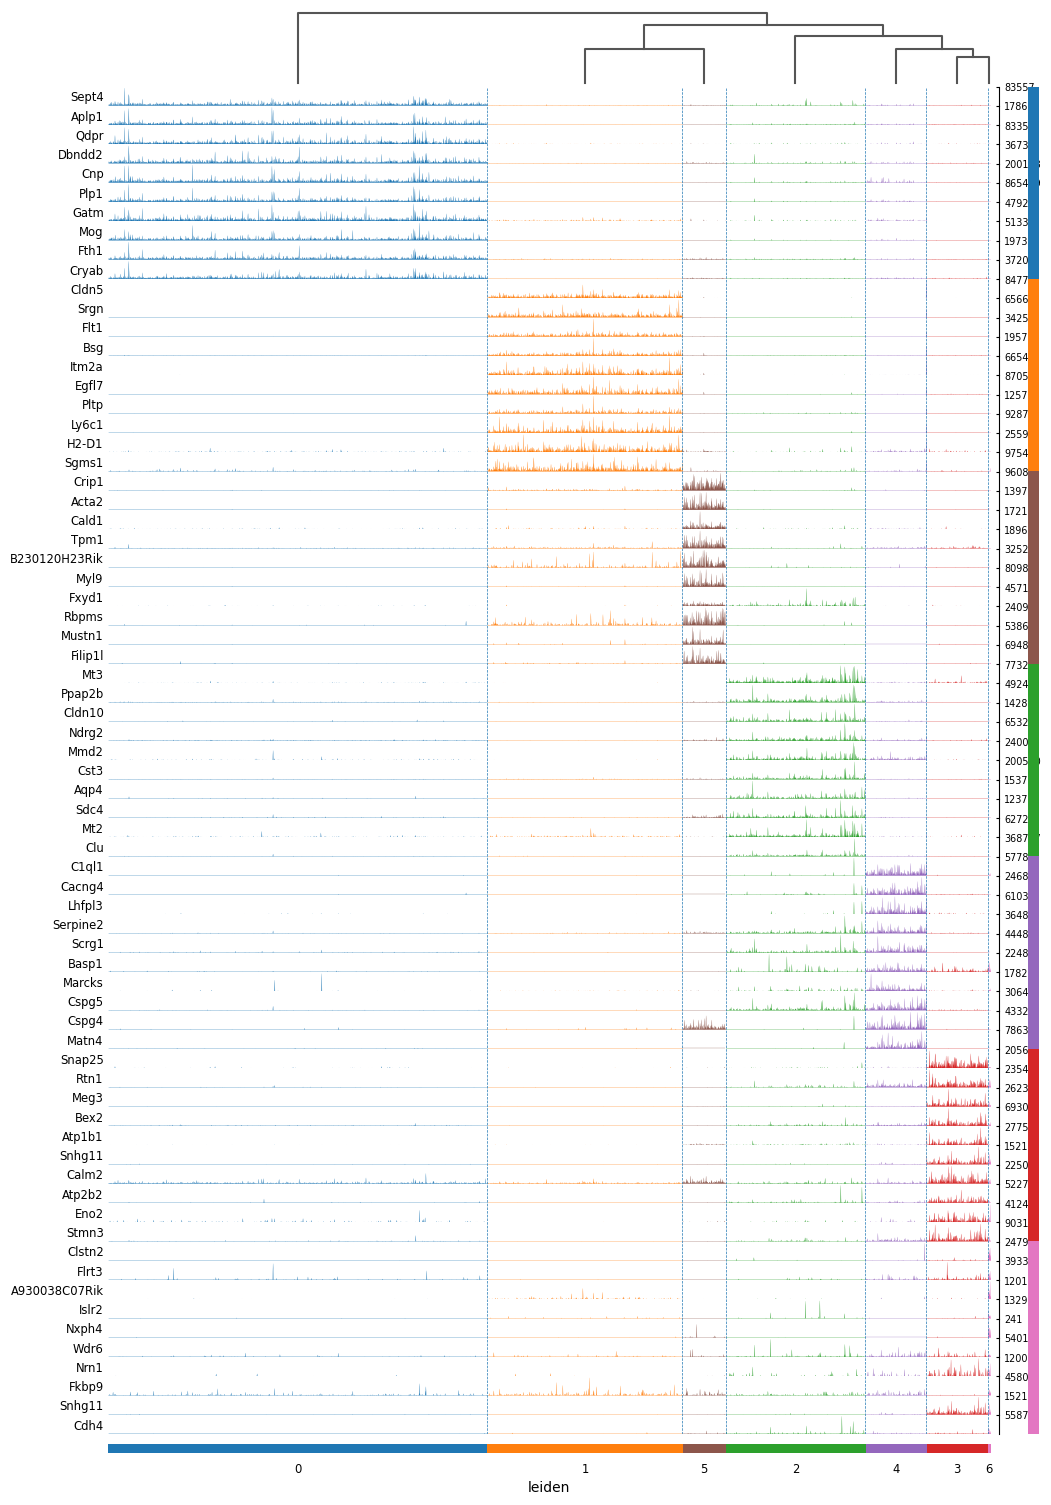

In [98]:
sc.tl.rank_genes_groups(adata, groupby='leiden', use_raw=True, method='t-test_overestim_var', n_genes=10)

sc.pl.rank_genes_groups_tracksplot(adata, groupby='leiden')

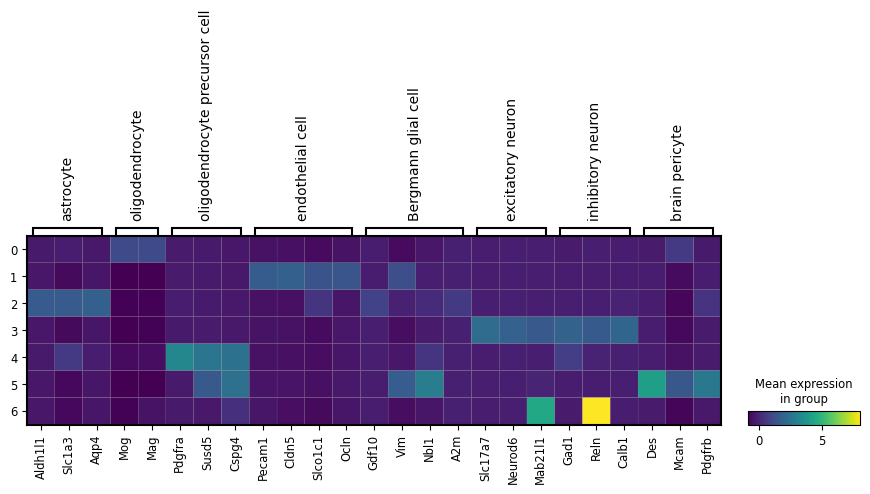

In [100]:
marker_genes = {
'astrocyte': ['Aldh1l1', 'Slc1a3', 'Aqp4'], 
'oligodendrocyte': ['Mog','Mag'],
'oligodendrocyte precursor cell': ['Pdgfra','Susd5','Cspg4'],
'endothelial cell': ['Pecam1','Cldn5','Slco1c1','Ocln'],
'Bergmann glial cell': ['Gdf10','Vim','Nbl1','A2m'],
'excitatory neuron': ['Slc17a7','Neurod6','Mab21l1'],
'inhibitory neuron': ['Gad1','Reln','Calb1'],
'brain pericyte': ['Des','Mcam','Pdgfrb']
}

sc.pl.matrixplot(adata, marker_genes, groupby='leiden', use_raw=False)